<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/Practice_LR__Input_Output_Polynomial_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate the signal x = 3 * sin(5k)

# Set a random seed for reproducibility
np.random.seed(12)  # You can use any integer value as the seed

# Generate 100 random floating-point values between 0 and 1
k_values = np.random.rand(100)

# k_values = np.arange(1, 101)
x = 3 * np.sin(5 * k_values)

# Calculate y using the linear model y = 2 + 3x + 5x^2 + 7x^3
y = 2 + 3 * x + 5 * x ** 2 + 7 * x ** 3

Original_parameters =[2, 3, 5, 7]

# # Plot the output  y
# plt.figure(figsize=(6,3))
# plt.plot(y, color='blue', label='Data Points')
# plt.xlabel('x')
# plt.title('Plot y')
# plt.legend()
# plt.grid(True)
# plt.show()

In [30]:
# Calculate x^2 and x^3

x_squared = x ** 2
x_cubed = x ** 3

# Choose the desired model structure order using the input variable
# model_order = 2 # Replace this value with the desired order: 1, 2, or 3

# Choose the desired model structure order using the input variable
model_order = int(input('What is the prefered model order:  '))  # Replace this value with the desired order: 1, 2, or 3

# Create the data dictionary based on the selected model structure order
data = {'X': x}
if model_order >= 2:
    data['X^2'] = x_squared
if model_order >= 3:
    data['X^3'] = x_cubed

# Create the DataFrame 'X' based on the selected columns
df = pd.DataFrame(data)
df['y'] = y

df.head()

What is the prefered model order:  2


,X,X^2,y
0,2.090159,4.368763,94.034145
1,-1.590141,2.528547,-18.272904
2,2.903578,8.430767,224.220316
3,1.366398,1.867044,33.292297
4,0.218431,0.047712,2.966806


In [31]:
# setup input and output
X = df.drop(columns='y', axis=1)
y = df['y']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.linear_model import LinearRegression

# Get the intercept (b0) and coefficients (bi) from the trained model
intercept = model.intercept_
coefficients = model.coef_

# Get the names of the features used in the model (X_train columns)
feature_names = X_train.columns

# Generate the model equation as a string
model_equation = "y = {:.2f}".format(intercept)

for i, coef in enumerate(coefficients):
    model_equation += " + {:.2f} * {}".format(coef, feature_names[i])

print("Model Equation:")
print(model_equation)

print("Original_parameters:")
print(Original_parameters)


Model Equation:
y = -10.47 + 53.99 * X + 5.67 * X^2
Original_parameters:
[2, 3, 5, 7]


In [34]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [35]:
import numpy as np

length_of_y_train = len(y_train)
No_train = np.arange(1, length_of_y_train + 1) # generates an array that starts from 1 and ends at the length of y_train

length_of_y_test = len(y_test)
No_test = np.arange(1, length_of_y_test + 1) # generates an array that starts from 1 and ends at the length of y_test

sdf = pd.DataFrame({
    'No': No_train,
    'Actual': y_train,
    'Predicted': y_pred_train
})

sdf.head()

,No,Actual,Predicted
55,1,180.585156,174.871737
88,2,244.764734,202.407629
26,3,97.697035,129.564327
42,4,124.272725,145.854382
69,5,3.850234,8.388276


In [36]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calculate metrics for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'MSE', 'MAE'],
    'Dataset': ['Train', 'Train', 'Test', 'Test'],
    'Value': [mse_train, mae_train, mse_test, mae_test]
})

# Assuming y_train and y_pred_train are defined
correlation = np.corrcoef(y_train, y_pred_train)[0, 1]

# The value of the correlation coefficient
print(f'Correlation coefficient =  {correlation: 0.3f}')

metrics_df.T

Correlation coefficient =   0.964


,0,1,2,3
Metric,MSE,MAE,MSE,MAE
Dataset,Train,Train,Test,Test
Value,1027.729193,27.875095,883.692733,24.683942


**Testing the Model in each case**
We generate a new random data set to test which model order will best perform (i.e., order 2 or 3). We would like to explore the effect of overfitting.

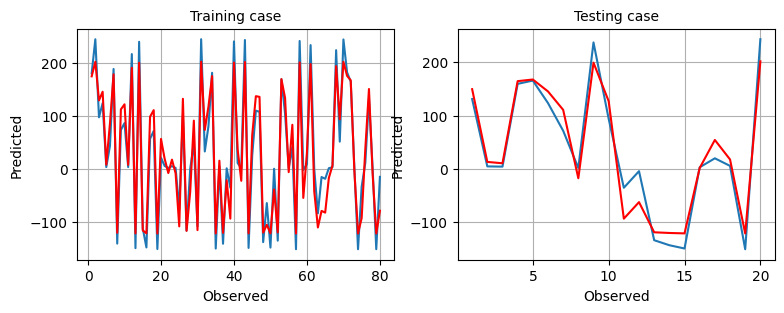

In [37]:
# Create a 2x1 grid of subplots
plt.figure(figsize=(9, 3))

# Subplot 1
plt.subplot(1, 2, 1)
plt.plot(No_train, y_train)
plt.plot(No_train, y_pred_train, color='red')
plt.title('Training case', fontsize= 10)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.grid(True)

# Subplot 2
plt.subplot(1, 2, 2)
plt.plot(No_test, y_test)
plt.plot(No_test, y_pred_test, color='red')
plt.title('Testing case', fontsize= 10)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.grid(True)

plt.show()

Results for y = a + bx
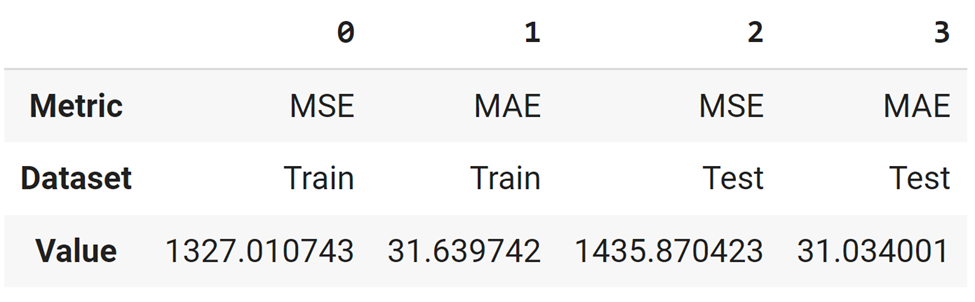

Results for y = a + b x + c x^2

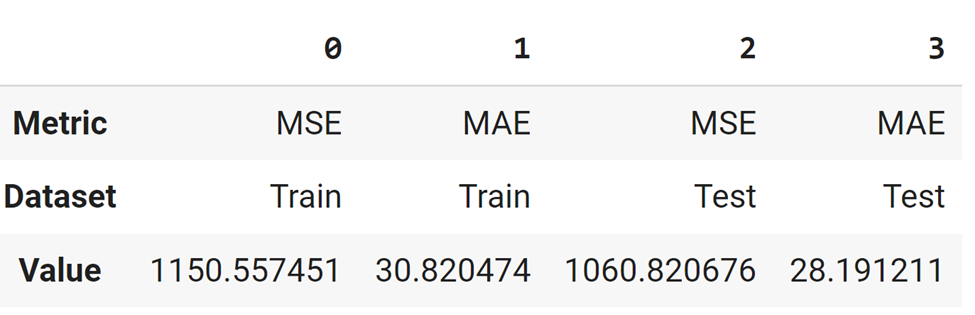